In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import seaborn as sn

In [2]:
#read features from csv file
df = pd.read_csv('features.csv')
df.set_index('filename', inplace=True)

In [3]:
#label encoding
y = df['genre']

#scaling the features
X = df.iloc[:, 1:]

In [4]:
#training/testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [5]:
#what are my ideal number of neighbors? 
#https://towardsdatascience.com/building-a-k-nearest-neighbors-k-nn-model-with-scikit-learn-51209555453a

from sklearn.model_selection import GridSearchCV

#create new a knn model
knn2 = KNeighborsClassifier()

#create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_neighbors': np.arange(1, 25)}

#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn2, param_grid, cv=5)

#fit model to data
knn_gscv.fit(X_train, y_train)

#check top performing n_neighbors value
knn_gscv.best_params_

/Users/IMF1/.virtualenvs/blowtorch/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'n_neighbors': 16}

In [6]:
knn = KNeighborsClassifier(n_neighbors=16, weights='uniform', algorithm='auto', leaf_size=30, p=2,
                                   metric='minkowski', metric_params=None, n_jobs=1)

knn.fit(X_train, y_train)
k_score = knn.score(X_test, y_test)
print("KNN Score: {0:.2f}%".format(k_score * 100))

KNN Score: 44.00%


In [7]:
y_pred = knn.predict(X_test)

In [8]:
print(knn.score(X_train, y_train))
print('Precision: {0:.3f}%'.format(metrics.precision_score(y_test, y_pred, average='micro') * 100))
print('Recall: {0:.3f}%'.format(metrics.recall_score(y_test, y_pred, average='micro') * 100))
print('Accuracy: {0:.3f}%'.format(metrics.accuracy_score(y_test, y_pred) * 100))
print('Predicted values:\n {}'.format(y_pred))

0.47875
Precision: 44.000%
Recall: 44.000%
Accuracy: 44.000%
Predicted values:
 ['classical' 'pop' 'pop' 'country' 'hiphop' 'metal' 'blues' 'classical'
 'disco' 'pop' 'blues' 'blues' 'reggae' 'country' 'classical' 'reggae'
 'reggae' 'hiphop' 'rock' 'country' 'pop' 'pop' 'disco' 'country' 'hiphop'
 'classical' 'hiphop' 'reggae' 'disco' 'classical' 'reggae' 'rock'
 'reggae' 'blues' 'reggae' 'disco' 'rock' 'pop' 'hiphop' 'metal' 'reggae'
 'rock' 'disco' 'disco' 'blues' 'pop' 'metal' 'classical' 'blues' 'reggae'
 'disco' 'hiphop' 'disco' 'country' 'pop' 'disco' 'metal' 'rock' 'pop'
 'metal' 'classical' 'blues' 'classical' 'country' 'metal' 'reggae'
 'disco' 'country' 'classical' 'metal' 'blues' 'jazz' 'blues' 'reggae'
 'blues' 'rock' 'pop' 'reggae' 'disco' 'reggae' 'hiphop' 'metal' 'rock'
 'pop' 'reggae' 'jazz' 'metal' 'country' 'classical' 'classical' 'hiphop'
 'metal' 'hiphop' 'reggae' 'country' 'blues' 'blues' 'blues' 'hiphop'
 'classical' 'metal' 'disco' 'blues' 'classical' 'pop' 'jazz

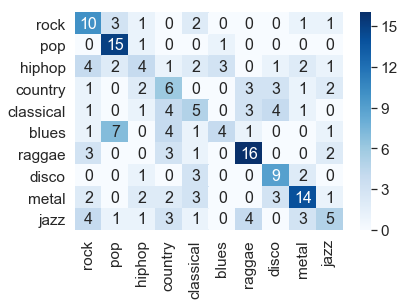

In [9]:
#confusion matrix using seaborn and matplotlib
#found on stackoverflow https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix
genres = ['rock', 'pop', 'hiphop', 'country', 'classical', 'blues', 'raggae', 'disco', 'metal', 'jazz']

#create confusion matrix using scikitlearn.metrics
cm = metrics.confusion_matrix(y_test, y_pred)

#create a dataframe confusion matric
df_cm = pd.DataFrame(cm, genres,
                  genres)
#plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}, cmap="Blues")# font size

In [10]:
#classification report
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       blues       0.38      0.56      0.45        18
   classical       0.54      0.88      0.67        17
     country       0.31      0.20      0.24        20
       disco       0.26      0.33      0.29        18
      hiphop       0.28      0.26      0.27        19
        jazz       0.50      0.21      0.30        19
       metal       0.59      0.64      0.62        25
         pop       0.45      0.60      0.51        15
      reggae       0.58      0.52      0.55        27
        rock       0.38      0.23      0.29        22

   micro avg       0.44      0.44      0.44       200
   macro avg       0.43      0.44      0.42       200
weighted avg       0.44      0.44      0.42       200

